Data Cleaning

In [ ]:
# @title Data Cleaning
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('dataset.csv')

df['Purchase'] = df['Purchase'].apply(lambda x: 1 if x >= 1 else 0 if x == 0 else np.nan)

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'].astype(str))

for col in ['TimeOnSite', 'Age']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df[col] = df[col].apply(lambda x: x if pd.isna(x) or (q1 - 1.5 * iqr <= x <= q3 + 1.5 * iqr) else np.nan)

imputer = SimpleImputer(strategy='median')
df[['TimeOnSite', 'Age', 'AdsClicked', 'PreviousPurchases']] = imputer.fit_transform(df[['TimeOnSite', 'Age', 'AdsClicked', 'PreviousPurchases']])

df = df.dropna(subset=['Purchase'])

scaler = StandardScaler()
df[['TimeOnSite', 'Age', 'AdsClicked', 'PreviousPurchases']] = scaler.fit_transform(df[['TimeOnSite', 'Age', 'AdsClicked', 'PreviousPurchases']])

df.to_csv('cleaned_purchase_data.csv', index=False)


Data Visualization

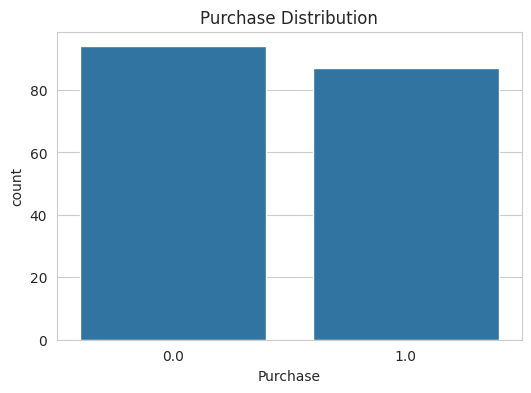

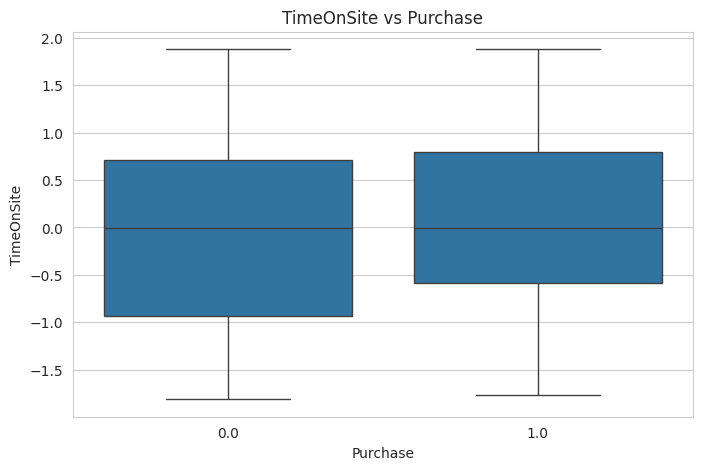

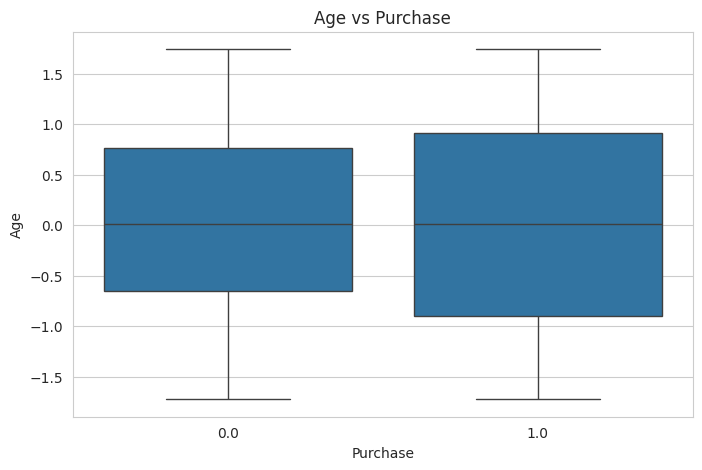

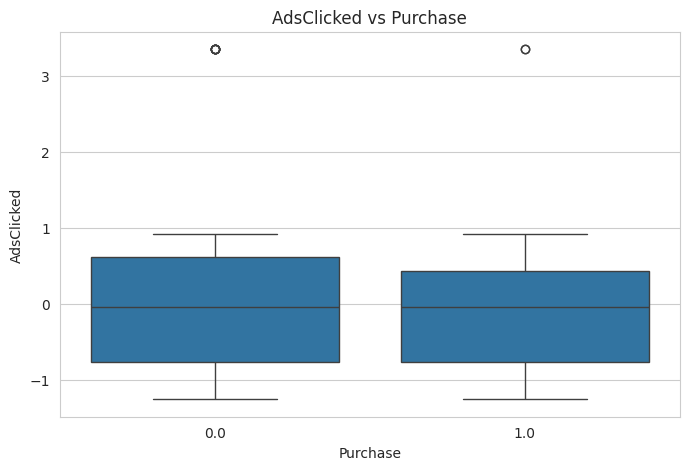

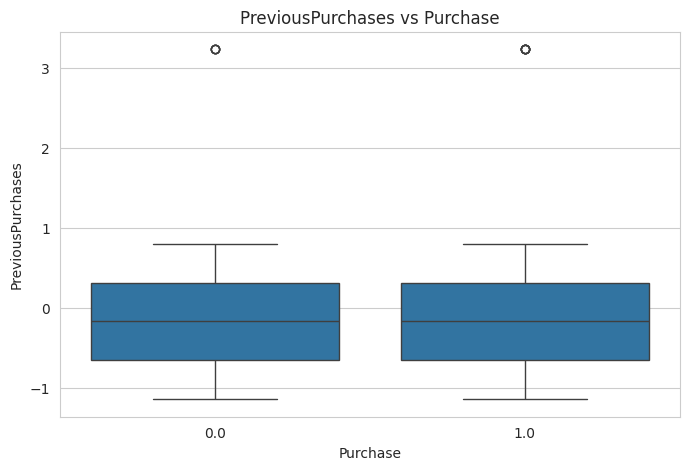

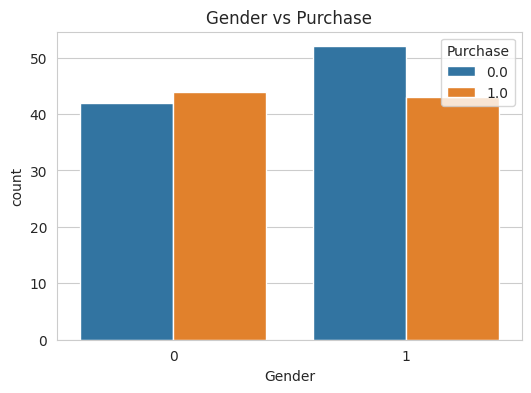

In [ ]:
# @title Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(6,4))
sns.countplot(x='Purchase', data=df)
plt.title('Purchase Distribution')
plt.show()

for col in ['TimeOnSite', 'Age', 'AdsClicked', 'PreviousPurchases']:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Purchase', y=col, data=df)
    plt.title(f'{col} vs Purchase')
    plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Purchase', data=df)
plt.title('Gender vs Purchase')
plt.show()


Logistic Regression

In [3]:
# @title Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df[['TimeOnSite', 'Age', 'Gender', 'AdsClicked', 'PreviousPurchases']]
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))
print("Accuracy:", accuracy_score(y_test, log_preds))


Logistic Regression Results:
[[22  4]
 [21  8]]
              precision    recall  f1-score   support

         0.0       0.51      0.85      0.64        26
         1.0       0.67      0.28      0.39        29

    accuracy                           0.55        55
   macro avg       0.59      0.56      0.51        55
weighted avg       0.59      0.55      0.51        55

Accuracy: 0.5454545454545454


Decision Tree

In [4]:
# @title Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict(X_test)

print("Decision Tree Results:")
print(confusion_matrix(y_test, tree_preds))
print(classification_report(y_test, tree_preds))
print("Accuracy:", accuracy_score(y_test, tree_preds))


Decision Tree Results:
[[12 14]
 [17 12]]
              precision    recall  f1-score   support

         0.0       0.41      0.46      0.44        26
         1.0       0.46      0.41      0.44        29

    accuracy                           0.44        55
   macro avg       0.44      0.44      0.44        55
weighted avg       0.44      0.44      0.44        55

Accuracy: 0.43636363636363634


Model Comparison

In [6]:
# @title Model Comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_model.predict(X_test)))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_model.predict(X_test)))

Logistic Regression Accuracy: 0.5454545454545454
Decision Tree Accuracy: 0.43636363636363634
